This is an example of using CNN on MNIST Dataset Using LeNet-5 Architecture .

Hope everyone watching this likes it.

Import the important libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

Import the data in the train and test from the input directory

In [2]:
# Input data files are available in the "../input/" directory.
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

check the shape of the train and test data

In [3]:
train.shape, test.shape

((42000, 785), (28000, 784))

Splitting the data into X and y(i.e independent and dependent varaible in simple terms)

In [4]:
X = train.drop(labels=["label"], axis=1)
y = train["label"]

# check the shape
X.shape, y.shape

((42000, 784), (42000,))

Now let us check whether the target variable is imbalanced or not in the training data



In [5]:
# checking manually
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

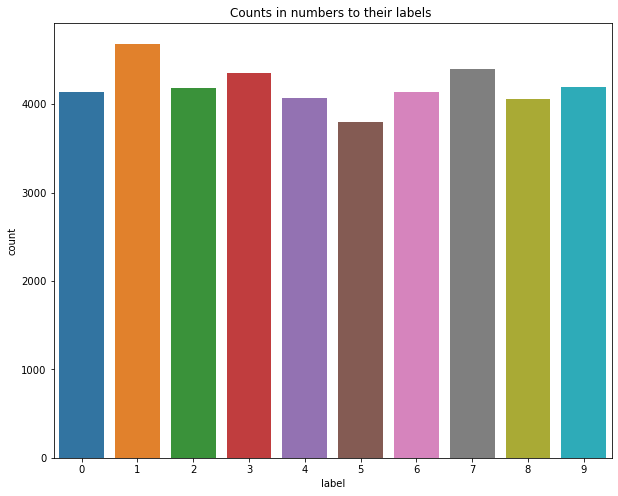

In [8]:
# Checking by plotting the same
plt.subplots(figsize = (10,8))
plt.title('Counts in numbers to their labels ')
sns.countplot(x=y, data=train)
plt.show()

We can easily conclude from the above that the data is not unbalanced

Now we will split the data into training and testing

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.1 , random_state = 99)
# check the shape now
X_train.shape,X_test.shape,y_train.shape,y_test.shape,test.shape

((37800, 784), (4200, 784), (37800,), (4200,), (28000, 784))

Here the shape of our data is not according to the CNN architecture, so we will reshape the data into CNN architecture that is (images,rows,cols,channels) Here the images will be the no of the images used , rows and columns will be the pixels of the images mentioned in the dataset descriptions which are 28 * 28 . since all images are gray scale so it will only use '1' channel

In [13]:
X_train=X_train.values.astype('float32')
X_test=X_test.values.astype('float32')
test=test.values.astype('float32')

Here above we converted the values of the data into float32, by which the above three dataframes got converted into a numpy array

In [14]:
# changing the shape of X_train and y_train and test also
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)
test=test.reshape(test.shape[0] , 28 , 28 , 1)

Now check the shape again

In [15]:
X_train.shape,X_test.shape,test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (28000, 28, 28, 1))

Now we will check the range values of the data.

In [16]:
# check the maximum values in the dataset
X_train.max(),X_train.min()

(255.0, 0.0)

We can easily that the data range is between 0 to 255, here we need to normalize the data to bring it into the range of 0 to 1 so that our model predicts the data more efficiently

In [17]:
X_train=X_train/255
X_test=X_test/255
test=test/255

In [18]:
# check the maximum values in the dataset
X_train.max(),X_train.min()

(1.0, 0.0)

Now our data has been normalized, we can also scale the data by using MinMaxScaler as well as Standard Scaler

**Now we will Build the Model**

Before building the model here we will need to pass the input shape

In [19]:
input_shape=X_train[0].shape
input_shape

(28, 28, 1)

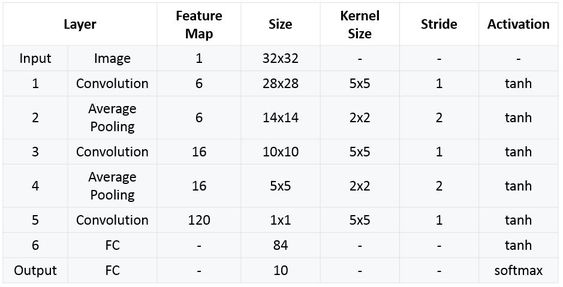

Above is the LeNet Architecture , we will build our model according to this architecture


In [26]:
# Build the Model
model= Sequential()
model.add(Conv2D(filters = 6, kernel_size = (5,5), activation='relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=2))
model.add(Conv2D(filters=16, kernel_size = 5, activation='relu'))
model.add(MaxPooling2D(pool_size = 2, strides=2))
model.add(Conv2D(filters=120, kernel_size = 5, activation='relu'))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compile the Model

In [27]:
# model.compile(optimizer= Adam(learning_rate =0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Check the summary of the model

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

Fitting the model

In [29]:
history = model.fit(X_train, y_train, batch_size=512, epochs=10, validation_split=0.2)

Train on 30240 samples, validate on 7560 samples
Epoch 1/10
30240/30240 [==============================] - 9s 285us/sample - loss: 0.9449 - accuracy: 0.7383 - val_loss: 0.4134 - val_accuracy: 0.8737
Epoch 2/10
30240/30240 [==============================] - 8s 270us/sample - loss: 0.3176 - accuracy: 0.9051 - val_loss: 0.2685 - val_accuracy: 0.9173
Epoch 3/10
30240/30240 [==============================] - 8s 264us/sample - loss: 0.2217 - accuracy: 0.9330 - val_loss: 0.2167 - val_accuracy: 0.9348
Epoch 4/10
30240/30240 [==============================] - 8s 261us/sample - loss: 0.1657 - accuracy: 0.9500 - val_loss: 0.1600 - val_accuracy: 0.9492
Epoch 5/10
30240/30240 [==============================] - 8s 264us/sample - loss: 0.1261 - accuracy: 0.9618 - val_loss: 0.1332 - val_accuracy: 0.9599
Epoch 6/10
30240/30240 [==============================] - 8s 259us/sample - loss: 0.1069 - accuracy: 0.9681 - val_loss: 0.1048 - val_accuracy: 0.9676
Epoch 7/10
30240/30240 [===========================

Evaluating the Model

In [31]:
#Evaluating the Model
model.evaluate(X_test, y_test, verbose=0)

[0.06583067650862393, 0.9802381]

pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.show()

Making the prediction using the model

In [32]:
# plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [33]:
y_pred = model.predict_classes(X_test)

In [34]:
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb64459e210>)

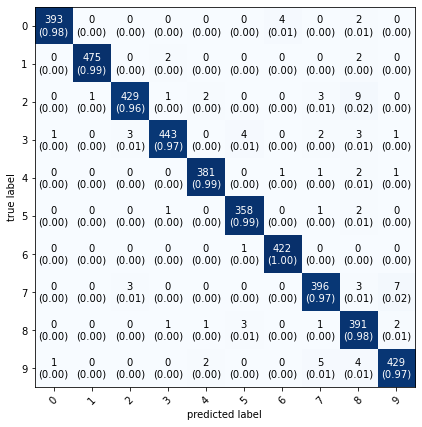

In [35]:
mat=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names= class_names,show_normed=True, figsize=(7,7))